In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from pandas import read_excel, DataFrame, Series
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
from numpy.random import seed
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving itog.xlsx to itog (1).xlsx


In [ ]:
#Загружаем первый датасет  и посмотрим на названия столбцов
df = pd.read_excel(open("itog.xlsx","rb"))
df.shape

(922, 14)

In [ ]:
df

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
1,1,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
2,2,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
3,3,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,60.000000
4,4,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,917,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,1,9.076380,47.019770
918,918,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,1,10.565614,53.750790
919,919,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,1,4.161154,67.629684
920,920,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,1,6.313201,58.261074


In [ ]:
df1=df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df1

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
1,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
2,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
3,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,60.000000
4,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,1,9.076380,47.019770
918,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,1,10.565614,53.750790
919,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,1,4.161154,67.629684
920,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,1,6.313201,58.261074


In [ ]:
#разбиваем на тестовую, тренировочную выборки, выделяя предикторы и целевые переменные
normalizer = Normalizer()
res = normalizer.fit_transform(df1)
df_norm_n = pd.DataFrame(res, columns = df1.columns)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(
    df_norm_n.loc[:, df_norm_n.columns != 'Модуль упругости при растяжении, ГПа'],
    df1[['Модуль упругости при растяжении, ГПа']],
    test_size = 0.3,
    random_state = 42)

In [ ]:
x_train_2.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
481,0.000528,0.589066,0.132149,0.020997,0.006254,0.071450,0.186083,0.767682,0.073037,0.000291,0.002285,0.015563
650,0.000430,0.617300,0.232509,0.027252,0.007346,0.075579,0.081347,0.739980,0.056839,0.000308,0.001350,0.018310
483,0.000580,0.585434,0.170519,0.043402,0.007074,0.096550,0.132807,0.772505,0.041487,0.000295,0.002249,0.018929
355,0.000911,0.545896,0.306130,0.024469,0.006610,0.070488,0.159918,0.757679,0.050148,0.000000,0.001774,0.012540
850,0.000573,0.595720,0.263992,0.034166,0.007519,0.089582,0.095597,0.740762,0.086336,0.000322,0.002765,0.017180


In [ ]:
# Проверка правильности разбивки
df_norm_n.shape[0] - x_train_2.shape[0] - x_test_2.shape[0]

0

In [ ]:
x_train_2.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
481,0.000528,0.589066,0.132149,0.020997,0.006254,0.071450,0.186083,0.767682,0.073037,0.000291,0.002285,0.015563
650,0.000430,0.617300,0.232509,0.027252,0.007346,0.075579,0.081347,0.739980,0.056839,0.000308,0.001350,0.018310
483,0.000580,0.585434,0.170519,0.043402,0.007074,0.096550,0.132807,0.772505,0.041487,0.000295,0.002249,0.018929
355,0.000911,0.545896,0.306130,0.024469,0.006610,0.070488,0.159918,0.757679,0.050148,0.000000,0.001774,0.012540
850,0.000573,0.595720,0.263992,0.034166,0.007519,0.089582,0.095597,0.740762,0.086336,0.000322,0.002765,0.017180


In [ ]:
y_train_2

,"Модуль упругости при растяжении, ГПа"
481,69.573625
650,80.691499
483,71.887367
355,68.314525
850,72.997468
...,...
106,74.519119
270,70.325533
860,77.995289
435,70.199234


In [ ]:
# Функция для сравнения результатов предсказаний с моделью, выдающей среднее значение по тестовой выборке
def mean_model(y_test_2):
    return [np.mean(y_test_2) for _ in range(len(y_test_2))]
y_2_pred_mean = mean_model(y_test_2)

In [ ]:
# Соотнесем данные на вход и выход для нейронной сети
tv = df1['Соотношение матрица-наполнитель']
tr_v = df1.loc[:, df1.columns != 'Соотношение матрица-наполнитель']
# Разбиваем выборки на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(tr_v, tv, test_size = 0.3, random_state = 14)

In [ ]:
#Проверим правильность распределения
tr_v

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
1,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
2,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
3,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,60.000000
4,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
917,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,1,9.076380,47.019770
918,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,1,10.565614,53.750790
919,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,1,4.161154,67.629684
920,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,1,6.313201,58.261074


In [ ]:
tv

0      1.857143
1      1.857143
2      2.771331
3      2.767918
4      2.569620
         ...   
917    2.271346
918    3.444022
919    3.280604
920    3.705351
921    3.808020
Name: Соотношение матрица-наполнитель, Length: 922, dtype: float64

In [ ]:
# Нормализуем данные для нейронной сети keras
x_train_n = tf.keras.layers.Normalization(axis =-1)
x_train_n.adapt(np.array(x_train))

In [ ]:
x_train_n

In [ ]:
def create_model(lyrs=[32], act='softmax', opt='KNN', dr=0.1):

    seed = 7
    np.random.seed(seed)
    tf.random.set_seed(seed)

    model = Sequential()
    model.add(Dense(lyrs[0], input_dim=x_train.shape[1], activation=act))
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))

    model.add(Dropout(dr))
    model.add(Dense(3, activation='tanh')) # выходной слой

    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['mae', 'accuracy'])
    return model

In [ ]:
# Сконфигурируем другую модель, зададим слои
from tensorflow.keras.layers import Dense
model1 = tf.keras.Sequential([x_train_n, Dense(128, activation='relu'),
                                                 Dense(128, activation='relu'),
                                                 Dense(128, activation='relu'),
                                                 Dense(64, activation='relu'),
                                                 Dense(64, activation='relu'),
                                                 Dense(32, activation='relu'),
                                                 Dense(1)
                            ])

model1.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])
# Посмотрим на архитектуру модели

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                        

In [ ]:
# Обучим модель
model_hist1 = model1.fit(
 x_train,
 y_train,
 epochs = 100,
 verbose = 1,
 validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 7s 18ms/step - loss: 4.7517 - root_mean_squared_error: 2.1798 - val_loss: 2.0565 - val_root_mean_squared_error: 1.4340
Epoch 2/100
17/17 [==============================] - 0s 7ms/step - loss: 1.3046 - root_mean_squared_error: 1.1422 - val_loss: 1.2388 - val_root_mean_squared_error: 1.1130
Epoch 3/100
17/17 [==============================] - 0s 10ms/step - loss: 1.0201 - root_mean_squared_error: 1.0100 - val_loss: 1.0907 - val_root_mean_squared_error: 1.0443
Epoch 4/100
17/17 [==============================] - 0s 8ms/step - loss: 0.9724 - root_mean_squared_error: 0.9861 - val_loss: 1.0977 - val_root_mean_squared_error: 1.0477
Epoch 5/100
17/17 [==============================] - 0s 8ms/step - loss: 0.9578 - root_mean_squared_error: 0.9787 - val_loss: 1.1306 - val_root_mean_squared_error: 1.0633
Epoch 6/100
17/17 [==============================] - 0s 7ms/step - loss: 0.8461 - root_mean_squared_error: 0.9198 - val_loss: 1.0782 - val_root

In [ ]:
model1.evaluate(x_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 1.1626 - root_mean_squared_error: 1.0782


[1.1625875234603882, 1.0782334804534912]

In [ ]:
y_pred_model = model1.predict(x_test)
print('Model Results:')
print('Model_MAE: ', round(mean_absolute_error(y_test, y_pred_model)))
print('Model_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test, y_pred_model)))
print("Test score: {:.2f}".format(mean_squared_error(y_test, y_pred_model)))

9/9 [==============================] - 0s 3ms/step
Model Results:
Model_MAE:  1
Model_MAPE: 0.36
Test score: 1.16


In [ ]:
# Посмотрим на потери модели
model_hist1.history

{'loss': [4.751740455627441,
  1.3046480417251587,
  1.0201101303100586,
  0.9723867177963257,
  0.9577638506889343,
  0.8460560441017151,
  0.8021392226219177,
  0.7440605163574219,
  0.7032465934753418,
  0.6341179013252258,
  0.5833081007003784,
  0.5453687906265259,
  0.51649010181427,
  0.491902232170105,
  0.40205061435699463,
  0.4231080114841461,
  0.3720455765724182,
  0.38381141424179077,
  0.31712132692337036,
  0.259462833404541,
  0.2137686014175415,
  0.17343583703041077,
  0.1474568396806717,
  0.12846407294273376,
  0.11080765724182129,
  0.09931116551160812,
  0.0783577710390091,
  0.05996045470237732,
  0.053427353501319885,
  0.05549425631761551,
  0.04738517478108406,
  0.03734425827860832,
  0.031636036932468414,
  0.02561994269490242,
  0.02172151766717434,
  0.02986767701804638,
  0.028326280415058136,
  0.02341710403561592,
  0.024489566683769226,
  0.029691915959119797,
  0.03796713799238205,
  0.03166718780994415,
  0.02818276919424534,
  0.017078405246138573,

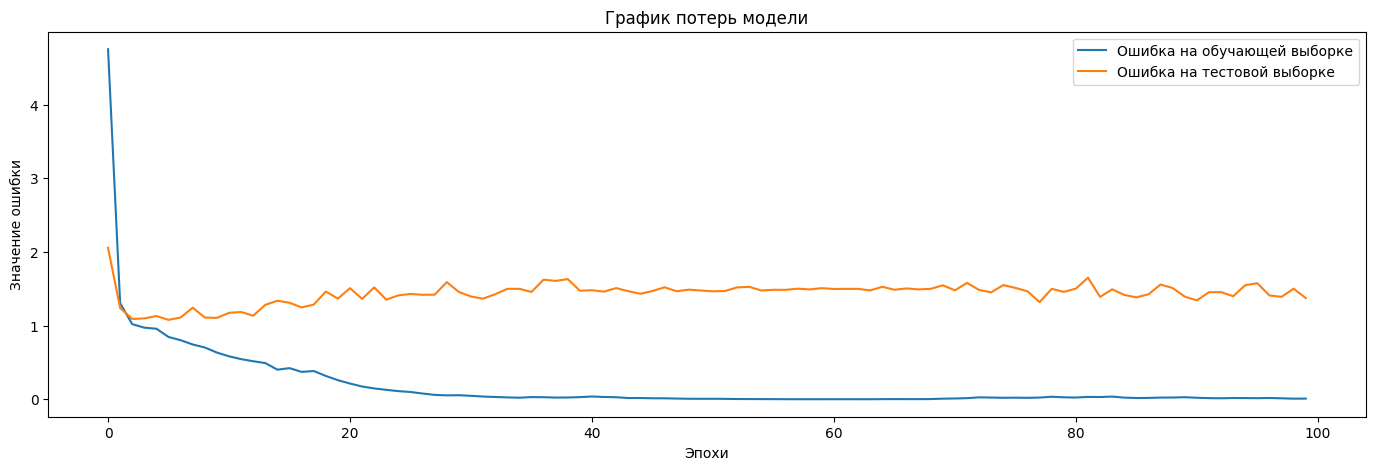

In [ ]:
# Посмотрим на график потерь на тренировочной и тестовой выборках
def model_loss_plot(model_hist1):
 plt.figure(figsize = (17,5))
 plt.plot(model_hist1.history['loss'],
 label = 'ошибка на обучающей выборке')
 plt.plot(model_hist1.history['val_loss'],
 label = 'ошибка на тестовой выборке')
 plt.title('График потерь модели')
 plt.ylabel('Значение ошибки')
 plt.xlabel('Эпохи')
 plt.legend(['Oшибка на обучающей выборке', 'Ошибка на тестовой выборке'], loc='best')
 plt.show()
model_loss_plot(model_hist1)

9/9 [==============================] - 0s 3ms/step


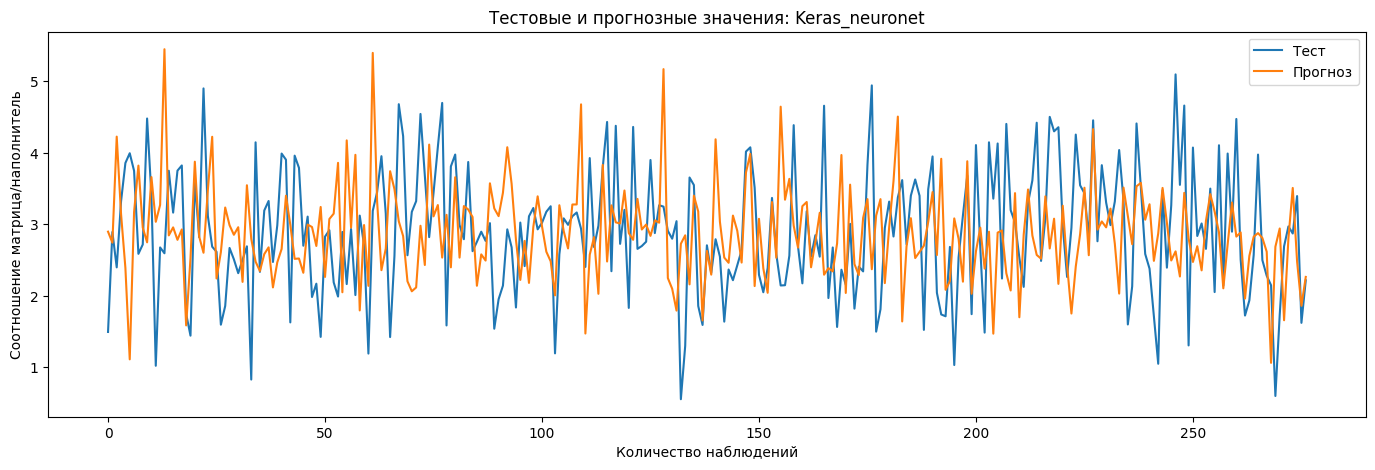

In [ ]:
# Зададим функцию для визуализации факт/прогноз для результатов моделей
# Посмотрим на график результата работы модели
def actual_and_predicted_plot(orig, predict, var, model_name):
 plt.figure(figsize=(17,5))
 plt.title(f'Тестовые и прогнозные значения: {model_name}')
 plt.plot(orig, label = 'Тест')
 plt.plot(predict, label = 'Прогноз')
 plt.legend(loc = 'best')
 plt.ylabel(var)
 plt.xlabel('Количество наблюдений')
 plt.show()
actual_and_predicted_plot(y_test.values, model1.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'Keras_neuronet')

In [ ]:
# оценка модели MSE
model1.evaluate(x_test, y_test, verbose = 1)

9/9 [==============================] - 0s 4ms/step - loss: 1.1626 - root_mean_squared_error: 1.0782


[1.1625875234603882, 1.0782334804534912]

9/9 [==============================] - 0s 4ms/step


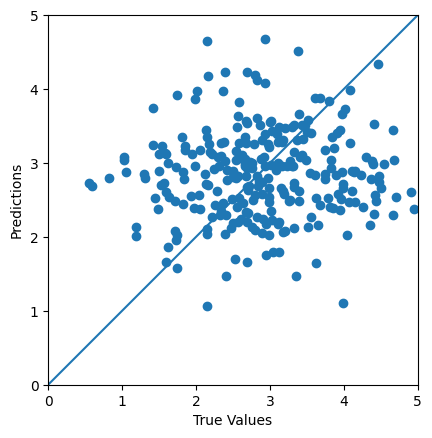

In [ ]:
test_predictions = model1.predict(x_test).flatten()
a = plt.axes(aspect = 'equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
model1.save("/content/drive/MyDrive/Model_test")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: ignored